<h1 style='color:red; text-align:center;'>Stock prediction using machine learning and python</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import keras

In [2]:
path='./Data/Google_Stock_Price_Train.csv'
stock_data = pd.read_csv(path,index_col="Date",parse_dates=True)
stock_data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"
2012-01-10,313.70,315.72,307.30,621.43,"88,24,000"
2012-01-11,310.59,313.52,309.40,624.25,"48,17,800"
2012-01-12,314.43,315.26,312.08,627.92,"37,64,400"
2012-01-13,311.96,312.30,309.37,623.28,"46,31,800"


In [3]:
stock_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"6,23,400"
2016-12-27,790.68,797.86,787.66,791.55,"7,89,100"
2016-12-28,793.70,794.23,783.20,785.05,"11,53,800"
2016-12-29,783.33,785.93,778.92,782.79,"7,44,300"
2016-12-30,782.75,782.78,770.41,771.82,"17,70,000"


<h2>Data Pre-processing</h2>

In [4]:
#shape of data
stock_data.shape

(1258, 5)

In [5]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"


In [6]:
stock_data.isnull().sum()
stock_data.isna().any()
#no nan or missing data hence data is cleaned

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [8]:
stock_data['Close'] = stock_data['Close'].str.replace(',','').astype(float)

In [9]:
stock_data['Volume'] = stock_data['Volume'].str.replace(',','').astype(float)

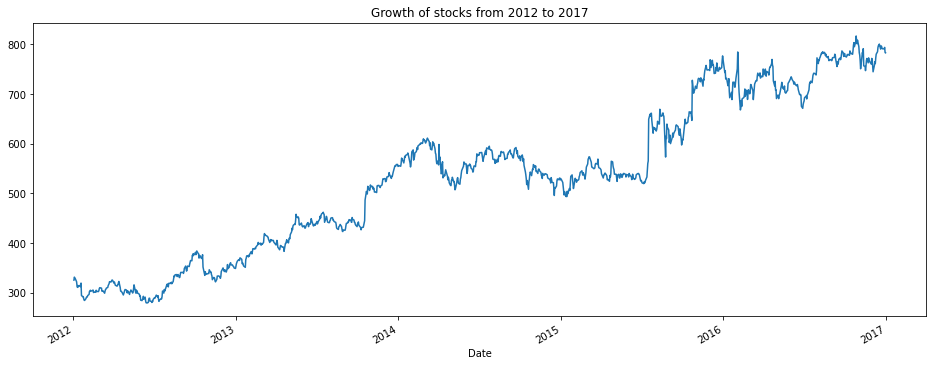

In [10]:
stock_data['Open'].plot(figsize=(16,6))
plt.title('Growth of stocks from 2012 to 2017')
plt.show()

In [11]:
#7 days rolling mean
stock_data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


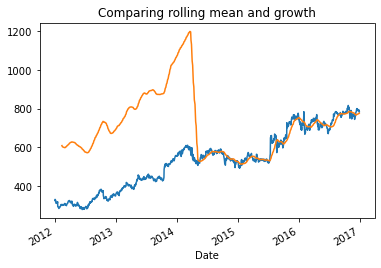

In [12]:
stock_data['Open'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()
plt.title("Comparing rolling mean and growth")
plt.show()

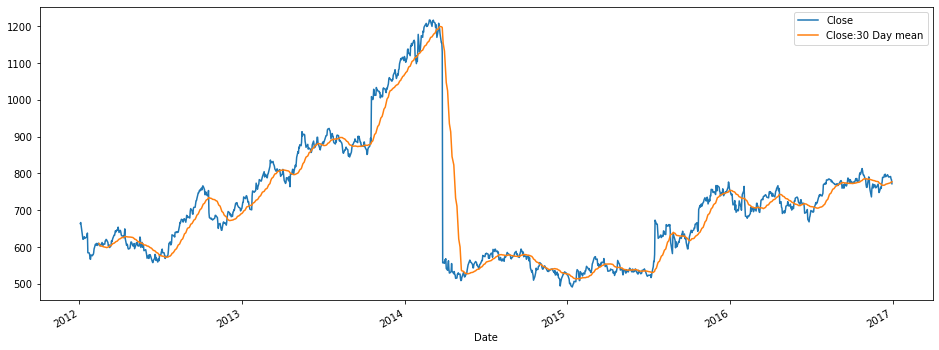

In [13]:
stock_data['Close:30 Day mean']=stock_data['Close'].rolling(window=30).mean()
stock_data[['Close','Close:30 Day mean']].plot(figsize=(16,6))
plt.show()

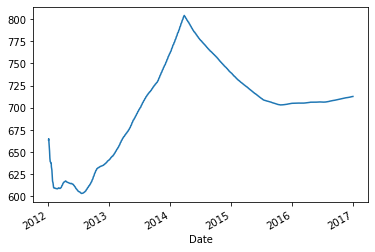

In [14]:
stock_data['Close'].expanding(min_periods=1).mean().plot()
plt.show()

In [15]:
training_data= stock_data['Open']
training_data=pd.DataFrame(training_data)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler(feature_range=(0,1))
training_data_scaled=sc.fit_transform(training_data)

In [18]:
#60 times and one output
X_train = []
Y_train = []
for i in range(60,1235):
    X_train.append(training_data_scaled[i-60:i,0])
    Y_train.append(training_data_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
# X_train.shape

<h2>Building RNN </h2>

In [19]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
regression = Sequential()

In [21]:
#Adding the first layer and some Dropout regularisation
regression.add(LSTM(units=50,return_sequences=True ,input_shape=(X_train.shape[1],1)))
regression.add(Dropout(0.2))

#Adding the second layer and some Dropout regularisation
regression.add(LSTM(units=50,return_sequences=True ))
regression.add(Dropout(0.2))

#Adding the third layer and some Dropout regularisation
regression.add(LSTM(units=50,return_sequences=True ))
regression.add(Dropout(0.2))

#Adding the third layer and some Dropout regularisation
regression.add(LSTM(units=50))
regression.add(Dropout(0.2))

#Adding output layer
regression.add(Dense(units=1))

<h2>Training RNN</h2>

In [22]:
#compiling the rnn
regression.compile(optimizer='adam',loss='mean_squared_error')

#fitting the rnn into Training set
regression.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
37/37 [==============================] - 53s 117ms/step - loss: 0.0941
Epoch 2/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0081
Epoch 3/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0050 0s - los
Epoch 4/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0048
Epoch 5/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0053
Epoch 6/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0051
Epoch 7/100
37/37 [==============================] - 4s 104ms/step - loss: 0.0045
Epoch 8/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0046
Epoch 9/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 10/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0043
Epoch 11/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0049
Epoch 12/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0041
Epo

37/37 [==============================] - 4s 109ms/step - loss: 0.0017
Epoch 100/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0017


<h2>Testing RNN</h2>

In [24]:
test_data = pd.read_csv('./Data/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [25]:
real_stock_price = test_data.iloc[:,1:2].values
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [26]:
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"16,57,300"
2017-01-04,788.36,791.34,783.16,786.90,"10,73,000"
2017-01-05,786.08,794.48,785.02,794.02,"13,35,200"
2017-01-06,795.26,807.90,792.20,806.15,"16,40,200"
2017-01-09,806.40,809.97,802.83,806.65,"12,72,400"


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [28]:
test_data['Volume'] = test_data['Volume'].str.replace(',','').astype(float)

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [30]:
test_set = test_data['Open']
test_set = pd.DataFrame(test_set)

In [31]:
#Getting the predicted stock price of 2018
dataset_total = pd.concat((stock_data['Open'],test_data['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regression.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


<h2>Data visulisation</h2>

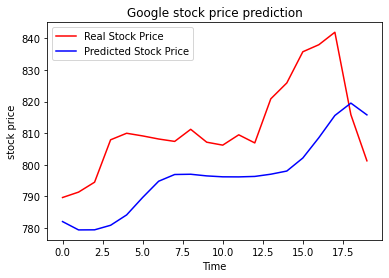

In [33]:
plt.plot(real_stock_price,color='red',label="Real Stock Price")
plt.plot(predicted_stock_price,color='blue',label="Predicted Stock Price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("stock price")
plt.legend()
plt.show()